<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/CaGraph/main/figures/icon.png" width="25%" style="padding: 20px">
</div>

# Generating and analyzing functional graphs of calcium imaging data

Developer: Veronica Porubsky <br>
Correspondence: verosky@uw.edu <br>
Example data provided by: Eric Zhang and Dr. Sean Piantadosi, Bruchas Lab, University of Washington<br>

This notebook implements a subset of the functionality provided by the Python package, cagraph. This package is designed to construct functional graphs using timeseries data of neurons recorded with calcium imaging. <br>

**Quick Links:** https://github.com/vporubsky/CaGraph


# Tutorial Outline
* [Installations and imports](#installations-imports)
* [Set path and filename](#path-filename)
* [Load and visualize raw calcium imaging data](#load-data)
* [Generate CaGraph object](#cagraph-object)
* [Analyze graph topology](#analyze-graph)
* [Visualize static graph](#visualize-static-graph)
* [Plotting matched samples](#plotting-matched-samples)



# Installations and imports  <a class="anchor" id="installations-imports"></a>

In [1]:
# !pip install -r requirements # uncomment to install package requirements
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import cagraph functionality
from cagraph import CaGraph, CaGraphTimeSamples
import visualization as viz
import preprocess as prep

# Additional useful imports and display setup for Jupyter notebook
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 150)
import os

# Set path and filename  <a class="anchor" id="path-filename"></a>

In [3]:
# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'dg_dataset.csv'


# Load and visualize raw calcium imaging data  <a class="anchor" id="load-data"></a>

In [4]:
# Generate graph object from numpy.ndarray
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')
print(f"This dataset contains {data.shape[0] - 1} neurons and {data.shape[1]} timepoints.")

# Visualize raw data using pandas.DataFrame
df = pd.DataFrame(data)
build_index = ['time']
for i in range(data.shape[0] - 1):
    build_index.append('neuron ' + str(i))
df.index = build_index
display(df)

This dataset contains 122 neurons and 3600 timepoints.


0         1        2         3        4     ...           3595           3596           3597           3598           3599
time        0.100000  0.200000  0.30000  0.400000  0.50000  ...   3.596000e+02   3.597000e+02   3.598000e+02   3.599000e+02   3.600000e+02
neuron 0    0.285750  0.262420  0.24099  0.221320  0.20325  ...   6.906700e-50   6.342800e-50   5.825000e-50   5.349400e-50   4.912600e-50
neuron 1    0.446380  0.404920  0.36731  0.333190  0.30225  ...   4.665400e+00   4.232100e+00   3.839000e+00   3.482400e+00   3.158900e+00
neuron 2    4.724500  4.098900  3.55620  3.085300  2.67680  ...   2.710500e-22   2.351600e-22   2.040200e-22   1.770100e-22   1.535700e-22
neuron 3    0.037735  0.033251  0.02930  0.025818  0.02275  ...   3.705800e-04   3.265400e-04   2.877400e-04   2.535400e-04   2.234200e-04
...              ...       ...      ...       ...      ...  ...            ...            ...            ...            ...            ...
neuron 117  0.000000  0.000000  0.00000  0.000000  0.00000  ...   1.653200e-02   1.370900e-02   1.136800e-02   9.427300e-03   7.817600e-03
neuron 118  0.000000  0.000000  0.00000  0.000000  0.00000  ...   6.452500e-07   5.611700e-07   4.880400e-07   4.244400e-07   3.691300e-07
neuron 119  0.232050  0.188370  0.15292  0.124130  0.10077  ...   2.642700e-06   2.145300e-06   1.741500e-06   1.413700e-06   1.147600e-06
neuron 120  0.351260  0.325990  0.30254  0.280780  0.26058  ...  3.047700e-111  2.828500e-111  2.625000e-111  2.436200e-111  2.261000e-111
neuron 121  0.950650  0.710150  0.53049  0.396290  0.29603  ...   3.042000e-70   2.272400e-70   1.697500e-70   1.268100e-70   9.472600e-71

[123 rows x 3600 columns]

# Generate CaGraph object <a class="anchor" id="cagraph-object"></a>

In [5]:
# Set hyperparameters
THRESHOLD = 0.3

# Generate graph object, called "cg" from CSV file 
cg = CaGraph(DATA_PATH + FILENAME, dataset_id = '1055-1', threshold=THRESHOLD) 
cg_graph = cg.get_graph() # Construct a graph

# Dataset information using CaGraph object
print(f"The dataset contains {cg.num_neurons} neurons and has a time interval of {cg.dt} sec")
print(f"Subject is {cg.data_id}")

The dataset contains 122 neurons and has a time interval of 0.1 sec
Subject is 1055-1


# Analyze graph topology <a class="anchor" id="analyze-graph"></a>

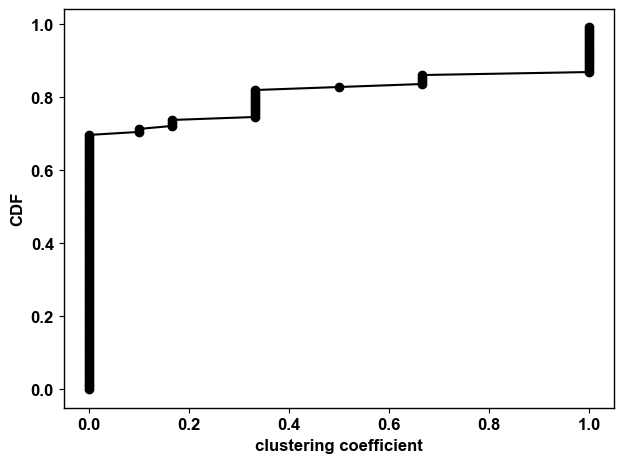

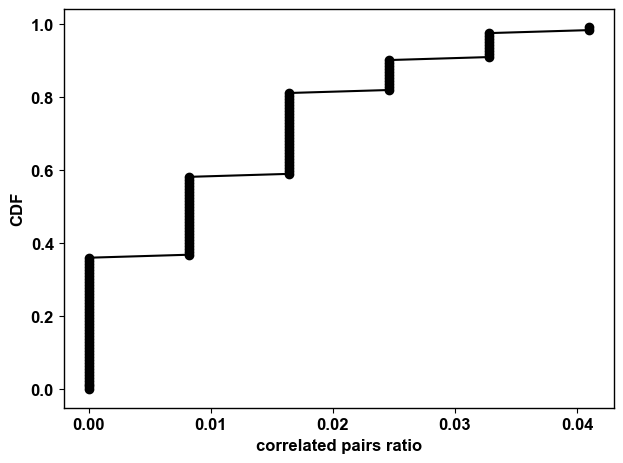

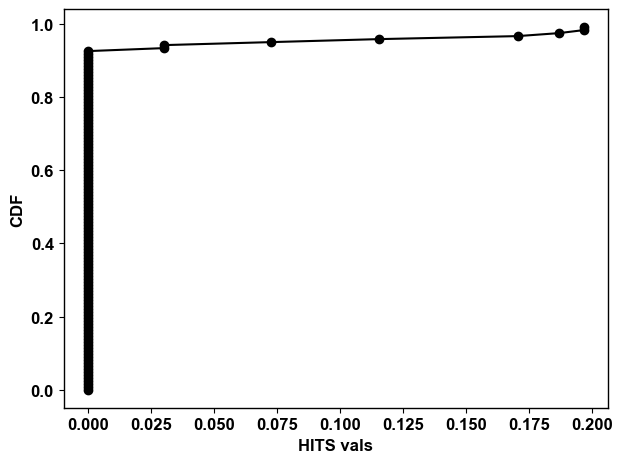

In [6]:
# Analyze graph topology
# Compute the clustering coefficient for all nodes
import matplotlib.pyplot as plt
plt.figure()
cg_cc = cg.graph_theory.get_clustering_coefficient()
viz.plot_CDF(data=cg_cc, x_label='clustering coefficient')

# Compute the correlated pairs ratio for all nodes
plt.figure()
cg_cr = cg.graph_theory.get_correlated_pair_ratio()
viz.plot_CDF(data=cg_cr, x_label='correlated pairs ratio')

# Compute the hubs in the graph
plt.figure()
cg_hits = cg.graph_theory.get_hits_values()
viz.plot_CDF(data=list(cg_hits), x_label='HITS vals')

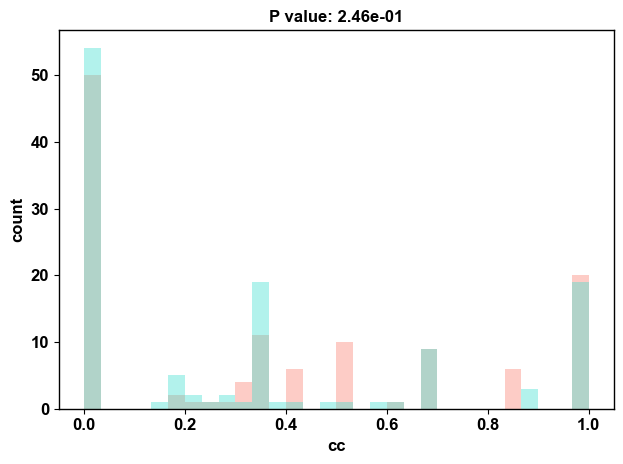

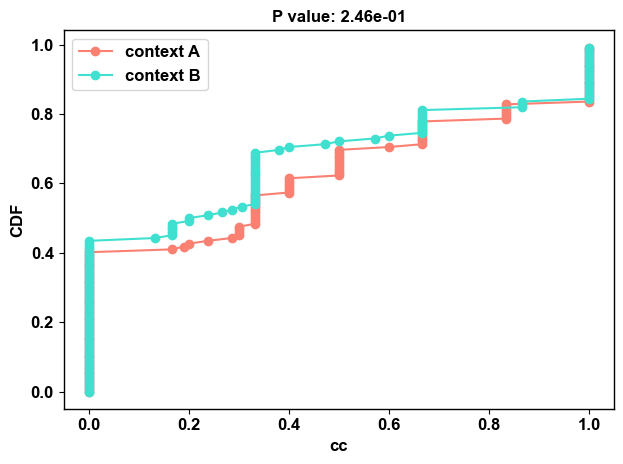

In [7]:
# Plotting CDF to compare two conditions
# Convert CSV to numpy.ndarry and index separate conditions
# Context A: second half of data
cg_A = CaGraph(np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')[:,1800:3600], threshold=THRESHOLD)
cg_A_cc = cg_A.graph_theory.get_clustering_coefficient()

# Context B: first half of data
cg_B = CaGraph(np.genfromtxt(DATA_PATH+ FILENAME, delimiter=',')[:,0:1800], threshold=THRESHOLD)
cg_B_cc = cg_B.graph_theory.get_clustering_coefficient()

# Plot histogram of distributions
viz.plot_histograms(data_list=[cg_A_cc, cg_B_cc],
                                x_label='cc',
                                colors=['salmon','turquoise'],
                                bin_size=30,
                                show_plot=True)

# Plot cumulative distribution function
viz.plot_CDFs(data_list=[cg_A_cc, cg_B_cc],
                                             x_label='cc',
                                             colors=['salmon', 'turquoise'],
                                             legend=['context A', 'context B'],
                                             show_plot=True)

# Visualize static graph <a class="anchor" id="visualize-static-graph"></a>

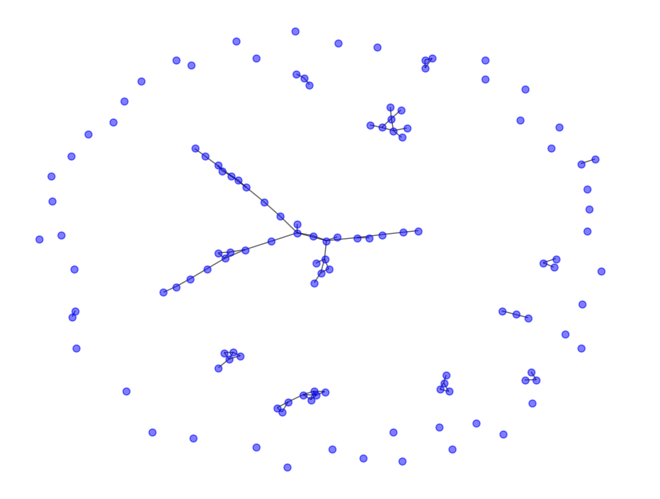

In [8]:
# Standard graph visualization with NetworkX
cg.draw_graph(graph=cg_graph) # Plot the graph (simplistic version)


# Plotting matched samples <a class="anchor" id="plotting_matched_samples"></a>

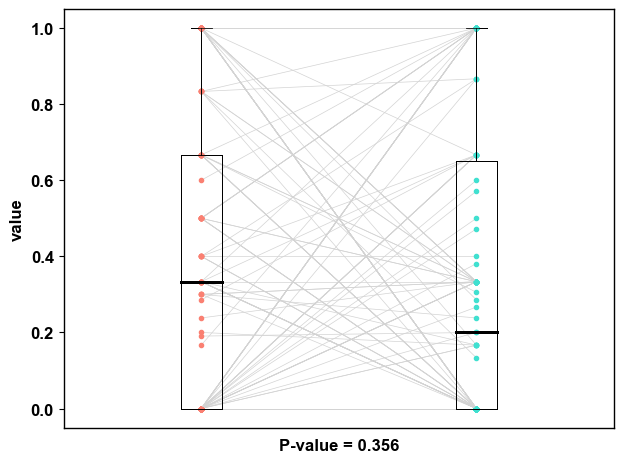

In [9]:
# Plotting matched samples
viz.plot_matched_data(sample_1=cg_A_cc,
                                  sample_2=cg_B_cc,
                                  labels=['A', 'B'],
                                  colors=['salmon','turquoise'],
                                  show_plot=True)

# Adding node metadata to CaGraph object <a class="anchor" id="node_metadata"></a>

In [10]:
import numpy as np
DATA_PATH = './datasets/'
data = np.genfromtxt(DATA_PATH + f'14-0_DG/14-0_D1_smoothed_calcium_traces.csv', delimiter=',')
context_active_metadata = np.genfromtxt(DATA_PATH + '14-0_DG/14-0_D1_neuron_context_active.csv', delimiter=',')
graph = CaGraph(data=data, node_metadata={'context_active': context_active_metadata})

# Added attribute "context_active" contains dictionary with node metadata
print(graph.context_active)

{0: 1.0, 1: 0.0, 2: 1.0, 3: 0.0, 4: 1.0, 5: 0.0, 6: 1.0, 7: 1.0, 8: 0.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 1.0, 21: 1.0, 22: 0.0, 23: 0.0, 24: 1.0, 25: 1.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 1.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 1.0, 34: 1.0, 35: 0.0, 36: 1.0, 37: 0.0, 38: 1.0}


# Adding node metadata to interactive visualization <a class="anchor" id="node_metadata_vizualization"></a>

In [11]:
graph = CaGraph(data=data, node_metadata={'context':context_active_metadata})
palette = ('grey','blue','red')

# Visualize graph with node metadata
viz.interactive_network(cagraph_obj=graph,
                        additional_attributes={'context':context_active_metadata},
                        adjust_size_by='degree', 
                        adjust_color_by='context', 
                        palette=palette,
                        show_in_notebook=True)

Loading BokehJS ...

# Report <a class="anchor" id="report"></a>

In [12]:
graph = CaGraph(data=data)
report = graph.get_report()
display(report)

hubs  degree  clustering coefficient  communities  eigenvector centrality  correlated pair ratio          HITS
0      1       6                0.400000            0            4.464879e-01               0.153846  1.503913e-01
1      0       2                1.000000            3            2.649169e-06               0.051282  4.399209e-18
2      0       2                1.000000            2            8.548406e-06               0.051282  4.399209e-18
3      0       0                0.000000            6            2.532581e-16               0.000000 -0.000000e+00
4      1       6                0.466667            0            4.693763e-01               0.153846  1.581009e-01
..   ...     ...                     ...          ...                     ...                    ...           ...
34     1       5                0.400000            0            3.810237e-01               0.128205  1.283409e-01
35     0       2                0.000000            1            2.597196e-02               0.051282  8.747587e-03
36     0       0                0.000000           17            2.532581e-16               0.000000 -0.000000e+00
37     1       5                0.500000            0            4.138706e-01               0.128205  1.394047e-01
38     0       2                0.000000            1            1.034859e-01               0.051282  3.485697e-02

[39 rows x 7 columns]

In [13]:
report = graph.get_report(parsing_nodes=[1,3,4,5])
display(report)


hubs  degree  clustering coefficient  communities  eigenvector centrality  correlated pair ratio          HITS
1     0       2                1.000000            3            2.649169e-06               0.051282  4.399209e-18
3     0       0                0.000000            6            2.532581e-16               0.000000 -0.000000e+00
4     1       6                0.466667            0            4.693763e-01               0.153846  1.581009e-01
5     0       0                0.000000            7            2.532581e-16               0.000000 -0.000000e+00

In [14]:
report = graph.get_report(parse_by_attribute='clustering coefficient', parsing_operation='>', parsing_value=0.2)
display(report)

hubs  degree  clustering coefficient  communities  eigenvector centrality  correlated pair ratio          HITS
0      1       6                0.400000            0                0.446488               0.153846  1.503913e-01
1      0       2                1.000000            3                0.000003               0.051282  4.399209e-18
2      0       2                1.000000            2                0.000009               0.051282  4.399209e-18
4      1       6                0.466667            0                0.469376               0.153846  1.581009e-01
6      0       3                0.333333            2                0.000010               0.076923  1.924654e-18
..   ...     ...                     ...          ...                     ...                    ...           ...
24     0       2                1.000000            0                0.137369               0.051282  4.627013e-02
27     0       2                1.000000            0                0.200080               0.051282  6.739346e-02
32     0       2                1.000000            3                0.000003               0.051282  2.749506e-18
34     1       5                0.400000            0                0.381024               0.128205  1.283409e-01
37     1       5                0.500000            0                0.413871               0.128205  1.394047e-01

[15 rows x 7 columns]

In [15]:
graph = CaGraph(data=data, node_metadata={'context_active': context_active_metadata})
report = graph.get_report(parse_by_attribute='context_active', parsing_operation='==', parsing_value=1)
display(report)

hubs  degree  clustering coefficient  communities  eigenvector centrality  correlated pair ratio          HITS  context_active
0      1       6                0.400000            0            4.464879e-01               0.153846  1.503913e-01             1.0
2      0       2                1.000000            2            8.548406e-06               0.051282 -1.099802e-18             1.0
4      1       6                0.466667            0            4.693763e-01               0.153846  1.581009e-01             1.0
6      0       3                0.333333            2            1.000237e-05               0.076923 -0.000000e+00             1.0
7      0       0                0.000000            8            2.532581e-16               0.000000 -0.000000e+00             1.0
..   ...     ...                     ...          ...                     ...                    ...           ...             ...
29     0       0                0.000000           14            2.532581e-16               0.000000 -0.000000e+00             1.0
33     0       2                0.000000            1            1.719227e-03               0.051282  5.785317e-04             1.0
34     1       5                0.400000            0            3.810237e-01               0.128205  1.283409e-01             1.0
36     0       0                0.000000           17            2.532581e-16               0.000000 -0.000000e+00             1.0
38     0       2                0.000000            1            1.034859e-01               0.051282  3.485697e-02             1.0

[19 rows x 8 columns]

# Timesampling class <a class="anchor" id="report"></a>

In [16]:
from cagraph import CaGraphTimeSamples

# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'bla_dataset.csv'

# Timesampled class
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')
ts_cagraph = CaGraphTimeSamples(data=data, 
                                time_samples=[(0,6000), (6000,12000), (12000,18000)], 
                                condition_labels=['prestim', 'stim', 'poststim'], 
                                threshold=0.2)

hubs  degree  clustering coefficient  communities  eigenvector centrality  correlated pair ratio      HITS
0      0       7                0.285714            2            1.708464e-01               0.179487  0.032909
1      0       4                0.166667            2            1.084099e-01               0.102564  0.020882
2      0      10                0.355556            2            2.412420e-01               0.256410  0.046469
3      0       9                0.388889            3            2.143688e-01               0.230769  0.041293
4      0      10                0.355556            0            2.748439e-01               0.256410  0.052940
..   ...     ...                     ...          ...                     ...                    ...       ...
34     0       5                0.800000            2            1.368739e-01               0.128205  0.026365
35     0       2                0.000000            1            3.214851e-02               0.051282  0.006192
36     0       5                0.800000            2            1.368739e-01               0.128205  0.026365
37     0       0                0.000000            7            9.778920e-23               0.000000 -0.000000
38     0       3                0.333333            4            1.910958e-02               0.076923  0.003681

[39 rows x 7 columns]

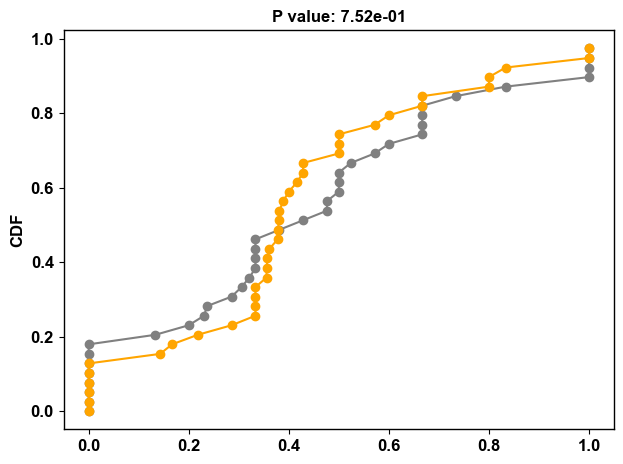

In [17]:
# Timesampled report on only one condition
display(ts_cagraph.get_cagraph('stim').get_report())

# Timesampled individual analyses
cc_prestim = ts_cagraph.get_cagraph('prestim').graph_theory.get_clustering_coefficient()
cc_stim = ts_cagraph.get_cagraph('stim').graph_theory.get_clustering_coefficient()
viz.plot_CDFs(data_list=[cc_prestim, cc_stim], colors=['grey', 'orange'])

In [18]:
#%% Timesampled visualization
pos = viz.interactive_network(ts_cagraph.get_cagraph('prestim'), return_position=True, show_in_notebook=True)

Loading BokehJS ...

In [20]:
viz.interactive_network(ts_cagraph.get_cagraph('stim'), position=pos, show_in_notebook=True)

Loading BokehJS ...

In [21]:
viz.interactive_network(ts_cagraph.get_cagraph('poststim'), position=pos, show_in_notebook=True)

Loading BokehJS ...

# Batched class <a class="anchor" id="batched_class"></a>

In [22]:
from cagraph import CaGraphBatches

# Set data path as the path to a directory containing multiple csv files which represent a condition, multiple animals
DATA_PATH = os.getcwd() + '/datasets/DG_FC/WT/WT_D1/'

# Create CaGraphBatches object named batch_cg with manually-set threshold
batch_cg = CaGraphBatches(data_path=DATA_PATH, threshold=0.2)
print(f"Individual dataset threshold is: {batch_cg.get_cagraph('122-2_D1').threshold}")
print(f"Overall threshold is: {batch_cg.threshold}")

Exception occurred for dataset 122-3_D1: PowerIterationFailedConvergence(PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
Individual dataset threshold is: 0.2
Overall threshold is: 0.2


In [23]:
# Create CaGraphBatches object named batch_cg, but now make the threshold auto-generated and averaged across all datasets
batch_cg = CaGraphBatches(data_path=DATA_PATH, threshold_averaged=True)
print(f"Individual dataset threshold is: {batch_cg.get_cagraph('122-2_D1').threshold}")
print(f"Overall threshold is: {batch_cg.threshold}")


Exception occurred for dataset 122-3_D1: PowerIterationFailedConvergence(PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')
Individual dataset threshold is: 0.20454545454545456
Overall threshold is: 0.20454545454545456


In [24]:
# Create CaGraphBatches object named batch_cg, but do not set a threshold or auto-average
batch_cg = CaGraphBatches(data_path=DATA_PATH)
print(f"Individual dataset threshold is: {batch_cg.get_cagraph('122-2_D1').threshold}")
print(f"Overall threshold is: {batch_cg.threshold}")

Individual dataset threshold is: 0.11
Overall threshold is: None


In [25]:
# Generate a batched report
WT_D1_report = batch_cg.get_full_report(save_report=True, save_path='/Users/veronica_porubsky/Desktop/', save_filename='WT_D1_full_report', save_filetype='csv')


display(WT_D1_report)




1055-4_D1_hubs  122-2_D1_hubs  14-0_D1_hubs  396-1_D1_hubs  396-3_D1_hubs  ...  124-2_D1_HITS  122-3_D1_HITS  122-1_D1_HITS  1055-3_D1_HITS  \
0               0.0            0.0           1.0            0.0            0.0  ...        7.81679       0.021271       0.010826    9.513102e-03   
1               0.0            0.0           0.0            0.0            0.0  ...        0.00000       0.022759       0.002867    9.207709e-03   
2               0.0            0.0           0.0            0.0            0.0  ...        0.00000      -0.000000       0.043439   -2.262990e-18   
3               0.0            0.0           0.0            0.0            0.0  ...        0.00000       0.002242       0.123126    5.127597e-04   
4               0.0            0.0           1.0            0.0            0.0  ...        0.00000       0.003484       0.109572   -7.896411e-19   
..              ...            ...           ...            ...            ...  ...            ...            ...            ...             ...   
160             NaN            NaN           NaN            NaN            NaN  ...            NaN            NaN            NaN             NaN   
161             NaN            NaN           NaN            NaN            NaN  ...            NaN            NaN            NaN             NaN   
162             NaN            NaN           NaN            NaN            NaN  ...            NaN            NaN            NaN             NaN   
163             NaN            NaN           NaN            NaN            NaN  ...            NaN            NaN            NaN             NaN   
164             NaN            NaN           NaN            NaN            NaN  ...            NaN            NaN            NaN             NaN   

     1055-1_D1_HITS  
0      4.387165e-18  
1      5.743141e-02  
2     -1.261310e-17  
3     -0.000000e+00  
4      5.045240e-17  
..              ...  
160             NaN  
161             NaN  
162             NaN  
163             NaN  
164             NaN  

[165 rows x 77 columns]

In [26]:
# You can access individual CaGraph objects for each dataset by passing in a dataset identifer to get_cagraph
batch_cg.get_cagraph('122-2_D1').clustering_coefficient
cg = batch_cg.get_cagraph('122-2_D1')
cg.clustering_coefficient

{0: 0.1,
 1: 0,
 2: 1.0,
 3: 0.1,
 4: 0.3333333333333333,
 5: 0.6666666666666666,
 6: 0,
 7: 0,
 8: 1.0,
 9: 0,
 10: 0.3333333333333333,
 11: 0,
 12: 0,
 13: 0.16666666666666666,
 14: 0,
 15: 0,
 16: 0.2,
 17: 0.3333333333333333,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0.3333333333333333,
 23: 0,
 24: 0,
 25: 1.0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0.2,
 31: 0,
 32: 0,
 33: 0,
 34: 0.2,
 35: 1.0}

In [28]:
# If you want a list of the dataset identifiers to use in the get_cagraph() call, use:
batch_cg.dataset_identifiers

['1055-4_D1',
 '122-2_D1',
 '14-0_D1',
 '396-1_D1',
 '396-3_D1',
 '1055-2_D1',
 '124-2_D1',
 '122-3_D1',
 '122-1_D1',
 '1055-3_D1',
 '1055-1_D1']

In [29]:
cc_122_D1 = WT_D1_report['122-2_D1_clustering coefficient']

In [32]:
list(WT_D1_report.columns)

['1055-4_D1_hubs',
 '122-2_D1_hubs',
 '14-0_D1_hubs',
 '396-1_D1_hubs',
 '396-3_D1_hubs',
 '1055-2_D1_hubs',
 '124-2_D1_hubs',
 '122-3_D1_hubs',
 '122-1_D1_hubs',
 '1055-3_D1_hubs',
 '1055-1_D1_hubs',
 '1055-4_D1_degree',
 '122-2_D1_degree',
 '14-0_D1_degree',
 '396-1_D1_degree',
 '396-3_D1_degree',
 '1055-2_D1_degree',
 '124-2_D1_degree',
 '122-3_D1_degree',
 '122-1_D1_degree',
 '1055-3_D1_degree',
 '1055-1_D1_degree',
 '1055-4_D1_clustering coefficient',
 '122-2_D1_clustering coefficient',
 '14-0_D1_clustering coefficient',
 '396-1_D1_clustering coefficient',
 '396-3_D1_clustering coefficient',
 '1055-2_D1_clustering coefficient',
 '124-2_D1_clustering coefficient',
 '122-3_D1_clustering coefficient',
 '122-1_D1_clustering coefficient',
 '1055-3_D1_clustering coefficient',
 '1055-1_D1_clustering coefficient',
 '1055-4_D1_communities',
 '122-2_D1_communities',
 '14-0_D1_communities',
 '396-1_D1_communities',
 '396-3_D1_communities',
 '1055-2_D1_communities',
 '124-2_D1_communities',
 